# Tarea 1
***Equipo 5***
1. Crear una función que calcule la estimación de la probabilidad a-priori para una clase. (2 puntos)
Nombre de función: apriori
Parámetros: 
a) Data frame con los datos
b) Nombre de la columna que contiene la clase a predecir
c) Clase sobre la que se calculará estimación de la probabilidad a-priori
Regresa:
Probabilidad a-priori

2. Crear una función que calcule la estimación de la media del PDF para una clase. (2 puntos)
Nombre de función: media
Parámetros: 
a) Data frame con los datos
b) Nombre de la columna que contiene la clase a predecir
c) Lista con los nombres de las variables independientes con los que se calculará la media. 
d) Clase sobre la que se calculará la estimación de la media
Regresa:
Vector con la media donde cada elemento mantiene el mismo orden de la lista de las variables independientes que se pasaron como parámetro

3. Crear una función que calcule la estimación de la varianza/covarianza del PDF para todos los datos. (se asume que todas las variables independientes poseen la misma varianza/covarianza). (2 puntos)
Nombre de función: var.covar
Parámetros: 
a) Data frame con los datos
b) Nombre de la columna que contiene la clase a predecir
c) Lista con los nombres de las variables independientes con los que se calculará la estimación de la varianza/covarianza
d) Clase sobre la que se calculará la estimación de la varianza/covarianza
Regresa:
Valor o Matriz con la  varianza/covarianza donde cada columna mantiene el mismo orden de la lista de las variables independientes que se pasaron como parámetro

4. Crear una función que calcule el discriminante para una clase dada. (2 puntos)
Nombre de función: delta
Parámetros: 
a) Vector numérico X con los valores a clasificar. Deben proporcionarse en el mismo orden con el que se estimaron la media y la varianza/covarianza 
c) probabilidad a-priori estimada para esa clase
d) Media estimada para esa clase
e) varianza/covarianza estimada para esa clase
Regresa:
Valor del discriminante para la clase dada

5) Crear una que función que clasifique una observación (1 punto)
Nombre de función: clasifica
Parámetros: 
a) Vector numérico X con los valores a clasificar. Deben proporcionarse en el mismo orden con el que se estimaron la media y la varianza/covarianza 
 
Regresa
Clase a la que pertenece la observación

6) Las estimaciones se realizarán sobre una muestra aleatoria del 80% de la base iris que se encuentra en R.  Se probará el 20% restante con la función clasifica. Se comparará la predicción contra la clase real y se reportará el porcentaje de aciertos (aquellas predicciones que sean idénticas a la clase real de la observación). Hay que realizar esta prueba con distintas variables independientes, tomando 1 o más de ellas. ¿Cómo afecta esto la predicción? (1 punto)

El cálculo de las estimaciones para el caso de la normal multivariada es muy similar al que vimos en clase. Ver página 109 del libro Elements of Statistical Learning.


# Clasificador LDA

 
Queremos clasificar la variable Species (v. dependiente), en base a alguna de las otras variables (independientes)

Primero cargamos las paqueterías necesarias, o sino se tienen instaladas, descargarlas.

In [1]:
#install.packages("tidymodels", "tidyverse")

library(tidymodels)
library(tidyverse)

-- Attaching packages -------------------------------------- tidymodels 0.1.1 --

v broom     0.7.0      v recipes   0.1.13
v dials     0.0.8      v rsample   0.0.7 
v dplyr     1.0.2      v tibble    3.0.3 
v ggplot2   3.3.2      v tidyr     1.1.1 
v infer     0.5.3      v tune      0.1.1 
v modeldata 0.0.2      v workflows 0.1.3 
v parsnip   0.1.3      v yardstick 0.0.7 
v purrr     0.3.4      

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x purrr::discard() masks scales::discard()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()
x recipes::step()  masks stats::step()

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v readr   1.3.1     v forcats 0.5.0
v stringr 1.4.0     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x readr::col_factor() masks scales::col_factor()
x purrr::discard()    masks scales::discard()
x dplyr::filter()     masks stats::filte

Procedemos a separar el set de datos en Train y Test con una proporción 80-20

In [2]:
set.seed(123)
iris_split<-initial_split(iris,prop=0.8)
iris_train<-training(iris_split)
iris_test<-testing(iris_split)

Vamos a trabajar con iris_train y vamos a tratar de clasificar la especie en base al Petal Length.

Vamos a ver un resumen de los datos.

In [3]:
summary(iris_train)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.000   Min.   :1.200   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.839   Mean   :3.073   Mean   :3.729   Mean   :1.188  
 3rd Qu.:6.400   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :41  
 versicolor:41  
 virginica :39  
                
                
                

Creamos un vector con las variavbles independientes y con las clases a predecir.

In [4]:
v_ind<-c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width")
clases <- c("setosa", "versicolor", "virginica")

Creamos las funciones solicitadas para estimar los parámetros para cada clase
## 1. apriori

$$\hat{\pi}_{k} = \frac{n_{k}}{n} $$

In [5]:
apriori<-function(df,columna,clase) {
  qclase<-filter(df,columna==clase)
  a<-nrow(qclase)
  b<-nrow(df)
  a/b}

In [6]:
aprioris <- c()
for(i in clases){
    aprioris[i] <- apriori(iris_train,iris_train$Species,i)
}
aprioris

setosa versicolor  virginica 
  0.338843   0.338843   0.322314

## 2.Media

$$\hat{\mu}_{k} = \frac{1}{n_{k}} \sum_{i:y_{i}=k} x_{i}$$

Calcular la media de los valores que toma el clasificador (v.ind) para los elementos de una clase. 

Si las variables independientes son varias, devuelve un vector de varios elementos. 

In [7]:
media<-function(df,columna,lista,clase){
  df %>% filter(columna==clase) %>% 
    select(lista) %>% 
    sapply(mean)}

Definimos vectores con las medias con cada variable      

In [8]:
medias_sl <- c()
medias_sw <- c()
medias_pl <- c()
medias_pw <- c()
for(i in clases){
    medias_sl[i] <- media(iris_train,iris_train$Species,v_ind[1],i)
}
for(i in clases){
    medias_sw[i] <- media(iris_train,iris_train$Species,v_ind[2],i)
    }
for(i in clases){
    medias_pl[i] <- media(iris_train,iris_train$Species,v_ind[3],i)
    }
for(i in clases){
    medias_pw[i] <- media(iris_train,iris_train$Species,v_ind[4],i)
    }


Note: Using an external vector in selections is ambiguous.
i Use `all_of(lista)` instead of `lista` to silence this message.
i See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



In [9]:
medias_sl
medias_sw
medias_pl
medias_pw

setosa versicolor  virginica 
  5.063415   5.941463   6.546154

setosa versicolor  virginica 
  3.465854   2.778049   2.969231

setosa versicolor  virginica 
  1.490244   4.270732   5.512821

setosa versicolor  virginica 
 0.2487805  1.3317073  2.0256410

In [10]:
#Medias de Petal Length y Pethal Width
medias_pwpl <- list()
for(i in clases){
    medias_pwpl[[i]] <- media(iris_train,iris_train$Species,v_ind[3:4],i)
}
medias_pwpl

$setosa
Petal.Length  Petal.Width 
   1.4902439    0.2487805 

$versicolor
Petal.Length  Petal.Width 
    4.270732     1.331707 

$virginica
Petal.Length  Petal.Width 
    5.512821     2.025641

In [11]:
#Medias de Sepal Length y Sepal Width
medias_swsl <- list()
for(i in clases){
    medias_swsl[[i]] <- media(iris_train,iris_train$Species,v_ind[1:2],i)
}
medias_swsl

$setosa
Sepal.Length  Sepal.Width 
    5.063415     3.465854 

$versicolor
Sepal.Length  Sepal.Width 
    5.941463     2.778049 

$virginica
Sepal.Length  Sepal.Width 
    6.546154     2.969231

In [12]:
#Medias de Sepal Length y Sepal Width
medias_swplpw <- list()
for(i in clases){
    medias_swplpw[[i]] <- media(iris_train,iris_train$Species,v_ind[2:4],i)
}
medias_swplpw

$setosa
 Sepal.Width Petal.Length  Petal.Width 
   3.4658537    1.4902439    0.2487805 

$versicolor
 Sepal.Width Petal.Length  Petal.Width 
    2.778049     4.270732     1.331707 

$virginica
 Sepal.Width Petal.Length  Petal.Width 
    2.969231     5.512821     2.025641

## 3.varianza y covarianza 

$$ \hat{\sigma}^2 = \sum_{k=1}^{K} \frac{(n_{k}-1)}{n-K} \frac{1}{(n_{k}-1)} \sum_{i:y_{i}=k} (x_{i}-\hat{\mu}_{k})^2$$

In [13]:
var.covar<-function(df,columna,lista,clase){
    #La función resive como parámetros un dataframe con los datos, 
    #la columna en la que están los datos a clasificar, las clases del dataframe y
    #una lista con los valores independientes
    #clase recibe un vector con las tres clases 
    #lista recibe las variables independientes
    n <- c()
    varianza <- c()
    covarianza <- list()
    
    for (i in 1:length(clase)){
        n[i]<- nrow(filter(df,columna==clase[i])) 
    }
    if(length(lista)==1){
        for(i in 1:length(clase)){
            aux <- df %>% filter(columna==clase[i]) %>%
                select(lista) %>%
                var()
            varianza[i] <- aux[[1]]
            }#EndFor Lista==1
        result <- (1/(nrow(df)-length(clase)))*((n[1]-1)*varianza[1]+(n[2]-1)*varianza[2]+(n[3]-1)*varianza[3])
        #names(result) <- clase
    }#EndIf Lista ==1
    else{
        for(i in 1:length(clase)){
            covarianza[[i]] <- df %>% filter(columna==clase[i]) %>%
                select(lista) %>%
                cov()
        }
        result <- (1/(nrow(df)-length(clase)))*((n[1]-1)*covarianza[[1]]+(n[2]-1)*covarianza[[2]]+(n[3]-1)*covarianza[[3]])
        #result <- (1/(nrow(df)-length(clase)))
    }
    return(result)
}

In [14]:
varianza_sl <- var.covar(iris_train,iris_train$Species,v_ind[1],clases)
varianza_sw <- var.covar(iris_train,iris_train$Species,v_ind[2],clases)
varianza_pl <- var.covar(iris_train,iris_train$Species,v_ind[3],clases)
varianza_pw <- var.covar(iris_train,iris_train$Species,v_ind[4],clases)
varianzas_l <- list(varianza_sl, varianza_sw, varianza_pl, varianza_pw)
names(varianzas_l)<- v_ind

In [15]:
varianzas_l

$Sepal.Length
[1] 0.2509454

$Sepal.Width
[1] 0.1210637

$Petal.Length
[1] 0.1705472

$Petal.Width
[1] 0.045471

In [16]:
#Probamos la función de varianzas y covarianzas para los palores de Petal length y pethal width
covarianzas_plpw <- var.covar(iris_train,iris_train$Species,v_ind[3:4],clases)
covarianzas_plpw

,Petal.Length,Petal.Width
Petal.Length,0.17054716,0.04139611
Petal.Width,0.04139611,0.04547100


In [17]:
#Probamos la función de varianzas y covarianzas para los palores de Sepal length y Sepal width
covarianzas_slsw <- var.covar(iris_train,iris_train$Species,v_ind[1:2],clases)
covarianzas_slsw

,Sepal.Length,Sepal.Width
Sepal.Length,0.25094540,0.09102951
Sepal.Width,0.09102951,0.12106369


In [18]:
#Probamos la función de varianzas y covarianzas para los palores de Sepal length y Sepal width
covarianzas_swplpw <- var.covar(iris_train,iris_train$Species,v_ind[2:4],clases)
covarianzas_swplpw

,Sepal.Width,Petal.Length,Petal.Width
Sepal.Width,0.1210637,0.04979140,0.03303050
Petal.Length,0.0497914,0.17054716,0.04139611
Petal.Width,0.0330305,0.04139611,0.04547100


## 4.delta

$$\delta_{k}(x) = \frac{x \mu_{k}}{\sigma ^2} - \frac{\mu_{k}^2}{2\sigma^2} + ln(\pi_{k}) $$

In [19]:
delta<-function(x,apriori_k,mean_k,var_k){
    #X el valor o valores a clasificar (dependiendo cuantas sean las v.ind)
    #apriori_k el apriori de una clase 
    #mean_k media de una clase 
    #var_k varianza y covarianza de una clase 
    if(length(var_k)==1){
        
         aux<- x*mean_k/var_k - mean_k^2/(2*var_k) +log(apriori_k)
        valor_delta <- aux[[1]]
    }else{

        aux <- t(x) %*% solve(var_k) %*%  as.vector(mean_k) - 1/2 * t(as.vector(mean_k)) %*% solve(var_k) %*% as.vector(mean_k) +log(apriori_k)
        valor_delta <- aux[1,1]
    }
    return(valor_delta)
}

In [20]:
delta(5,aprioris[1],medias_sl[1],varianza_sl)

[1] 48.7214

In [21]:
delta(c(4,7),aprioris[1], medias_pwpl[[1]],covarianzas_plpw )

[1] 7.956373

# 5.Clasifica

recibe un data frame/tibble de un renglon, donde los nombres de las columnas son los nombres de las variables independientes. 

In [22]:
clasifica<-function(x, medias_l, varianza_l, delta = delta,aprioris = aprioris, clases=clases){
    #x es un vector donde la cantidad de columnas es la cantidad de variables independientes
    #medias_l[[v_ind[1]]][clases[i]]
    delta_v <- c()
   for ( i in 1:length(clases)){
        delta_v[i] <- delta(x,aprioris[i],medias_l[[i]],varianza_l)    }
    names(delta_v)<- clases
    result <- names(delta_v[which.max(delta_v)])
    return(result)
    }

In [23]:
#Probamos la función con el parámetro de Petal Width
clasifica(4, medias_pw, varianza_pw, delta = delta,aprioris = aprioris, clases=clases)

[1] "virginica"

In [24]:
#Probamos la función con los parámetros de Pethal Width y Pethal Length
clasifica(c(4,5), medias_pwpl, covarianzas_plpw, delta = delta,aprioris = aprioris, clases=clases)

[1] "virginica"

Vamos a probar las funciones en conjunto con los datos de prueba, para esto vamos probar primero el caso univariado con la variable independiente Sepal Length

In [25]:
x_sl<-iris_test[,c("Sepal.Length"),drop=F]
test_Sepal.Length <- apply(x_sl,1,FUN=clasifica, medias_l=medias_sl, varianza_l=varianza_sl,delta=delta, aprioris=aprioris, clases=clases)

iris_test_Sepal.Length <- cbind(iris_test, test_Sepal.Length) %>% mutate(clasifica_bien = Species ==test_Sepal.Length)

iris_test_Sepal.Length

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,test_Sepal.Length,clasifica_bien
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<lgl>
4.6,3.4,1.4,0.3,setosa,setosa,TRUE
4.4,2.9,1.4,0.2,setosa,setosa,TRUE
4.3,3.0,1.1,0.1,setosa,setosa,TRUE
4.6,3.6,1.0,0.2,setosa,setosa,TRUE
5.0,3.0,1.6,0.2,setosa,setosa,TRUE
5.4,3.4,1.5,0.4,setosa,setosa,TRUE
5.0,3.5,1.3,0.3,setosa,setosa,TRUE
4.4,3.2,1.3,0.2,setosa,setosa,TRUE
5.0,3.3,1.4,0.2,setosa,setosa,TRUE


Podemos observar que tomando como variable independiente a 	Sepal.Length no logra de clasificar de manera adecuada, procedemos a calcular la proporción de valores clasificados correctamente.

In [26]:
iris_test_Sepal.Length %>% 
    filter(clasifica_bien==TRUE) %>% 
    nrow() /nrow(iris_test_Sepal.Length)

[1] 0.7241379

Logramos obtener un ***72.41%*** de observaciones clasificadas de manera correcta. Esto se debe a que las clases no están bien separadas como se puede observar en la siguiente gráfica.

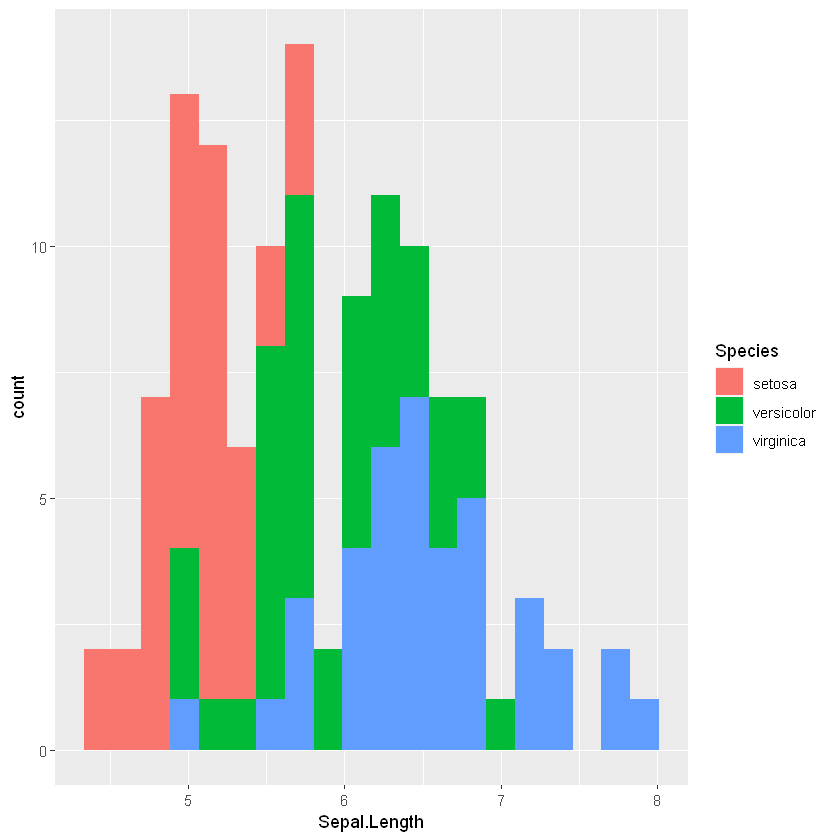

In [27]:
ggplot(iris_train,aes(Sepal.Length,fill=Species))+
  geom_histogram(bins=20)

Como se observa en el histograma, las clases no están bien separadas.

Ahora procedemos a probar con la variable Petal.Length.

In [28]:
x_pl<-iris_test[,c("Petal.Length"),drop=F]
test_Petal.Length <- apply(x_pl,1,FUN=clasifica, medias_l=medias_pl, varianza_l=varianza_pl,delta=delta, aprioris=aprioris, clases=clases)

iris_test_Petal.Length <- cbind(iris_test, test_Petal.Length) %>% mutate(clasifica_bien = Species ==test_Petal.Length)

iris_test_Petal.Length

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,test_Petal.Length,clasifica_bien
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<lgl>
4.6,3.4,1.4,0.3,setosa,setosa,TRUE
4.4,2.9,1.4,0.2,setosa,setosa,TRUE
4.3,3.0,1.1,0.1,setosa,setosa,TRUE
4.6,3.6,1.0,0.2,setosa,setosa,TRUE
5.0,3.0,1.6,0.2,setosa,setosa,TRUE
5.4,3.4,1.5,0.4,setosa,setosa,TRUE
5.0,3.5,1.3,0.3,setosa,setosa,TRUE
4.4,3.2,1.3,0.2,setosa,setosa,TRUE
5.0,3.3,1.4,0.2,setosa,setosa,TRUE


Podemos observar que tomando a la variable Petal.Length tenemos un mejor desempeño en el modelo. Revisamos la proporción de observaciones clasificadas de manera correcta.

In [29]:
iris_test_Petal.Length %>% 
    filter(clasifica_bien==TRUE) %>% 
    nrow() /nrow(iris_test_Petal.Length)

[1] 0.9655172

Logramos obtener un ***96.55%*** de observaciones clasificadas de manera correcta. Esto se debe a que las clases están bien separadas como se puede observar en la siguiente gráfica.

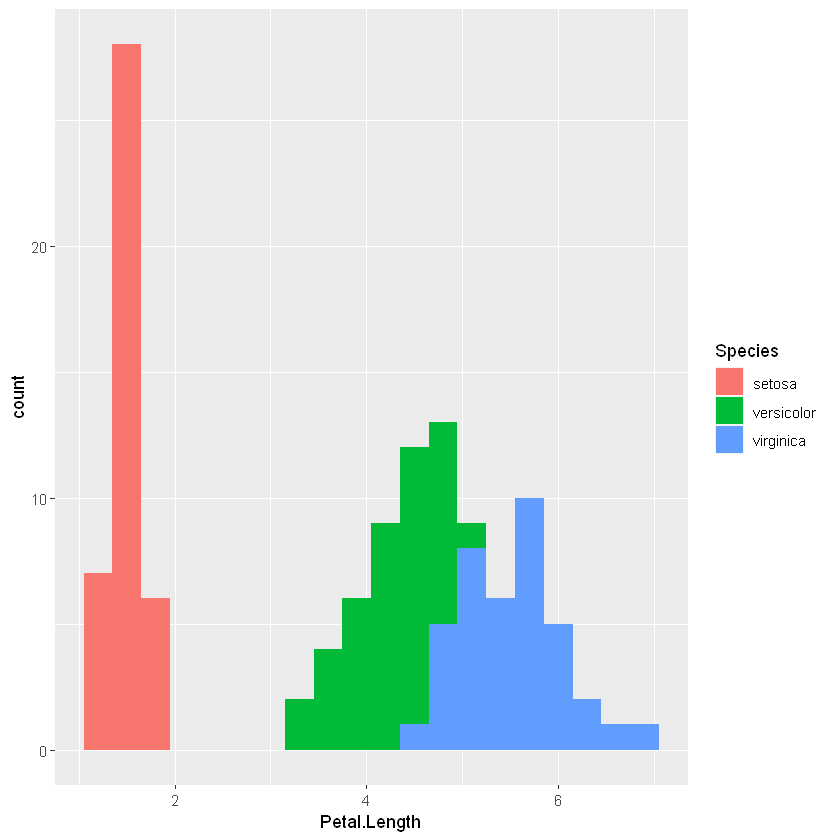

In [30]:
ggplot(iris_train,aes(Petal.Length,fill=Species))+
  geom_histogram(bins=20)

Como se observa en el histograma, las clases están bien separadas.

Procedemos a probar el caso multivariado.

El primer caso que vamos a revisar es tomando las variables Sepal.Length y Sepal.Width.

In [31]:
x_slsw <-iris_test[,c("Sepal.Length","Sepal.Width"),drop=F]
test_Sepal.Length_Width <- apply(x_slsw,1,FUN=clasifica, medias_l=medias_swsl, varianza_l=covarianzas_slsw,delta=delta, aprioris=aprioris, clases=clases)

iris_test_Sepal.Length_Width <- cbind(iris_test, test_Sepal.Length_Width) %>% mutate(clasifica_bien = Species ==test_Sepal.Length_Width)

iris_test_Sepal.Length_Width

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,test_Sepal.Length_Width,clasifica_bien
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<lgl>
4.6,3.4,1.4,0.3,setosa,setosa,TRUE
4.4,2.9,1.4,0.2,setosa,setosa,TRUE
4.3,3.0,1.1,0.1,setosa,setosa,TRUE
4.6,3.6,1.0,0.2,setosa,setosa,TRUE
5.0,3.0,1.6,0.2,setosa,setosa,TRUE
5.4,3.4,1.5,0.4,setosa,setosa,TRUE
5.0,3.5,1.3,0.3,setosa,setosa,TRUE
4.4,3.2,1.3,0.2,setosa,setosa,TRUE
5.0,3.3,1.4,0.2,setosa,setosa,TRUE


Podemos observar que tomando a las variables Sepal.Length y Sepal.Width logramos clasificar bastante bien a la clase setosa, sin embargo, para las otras clases hay errores. Revisamos la proporción de observaciones clasificadas de manera correcta.

In [32]:
iris_test_Sepal.Length_Width %>% 
    filter(clasifica_bien==TRUE) %>% 
    nrow() /nrow(iris_test_Sepal.Length_Width)

[1] 0.8275862

Logramos obtener un ***82.75%*** de observaciones clasificadas de manera correcta. Al añadir una variable más logramos mejorar el rendimiento del modelo, sin embargo, para clasificar versicolor y virginica hay errores debido a que no está bien separado como podemos observar en la siguiente gráfica.

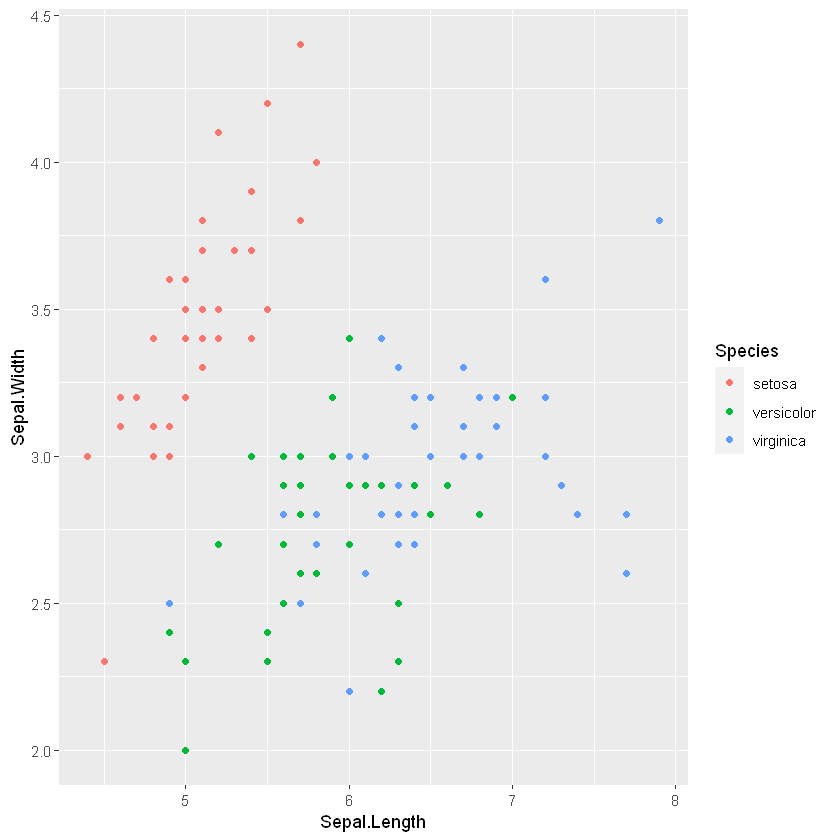

In [33]:
ggplot(iris_train,aes(x=Sepal.Length,y=Sepal.Width,color =Species))+ geom_point()


In [34]:
x_plpw <-iris_test[,c("Petal.Length","Petal.Width"),drop=F]
test_Petal.Length_Width <- apply(x_plpw,1,FUN=clasifica, medias_l=medias_pwpl, varianza_l=covarianzas_plpw,delta=delta, aprioris=aprioris, clases=clases)

iris_test_Petal.Length_Width <- cbind(iris_test, test_Petal.Length_Width) %>% mutate(clasifica_bien = Species ==test_Petal.Length_Width)

iris_test_Petal.Length_Width

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,test_Petal.Length_Width,clasifica_bien
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<lgl>
4.6,3.4,1.4,0.3,setosa,setosa,TRUE
4.4,2.9,1.4,0.2,setosa,setosa,TRUE
4.3,3.0,1.1,0.1,setosa,setosa,TRUE
4.6,3.6,1.0,0.2,setosa,setosa,TRUE
5.0,3.0,1.6,0.2,setosa,setosa,TRUE
5.4,3.4,1.5,0.4,setosa,setosa,TRUE
5.0,3.5,1.3,0.3,setosa,setosa,TRUE
4.4,3.2,1.3,0.2,setosa,setosa,TRUE
5.0,3.3,1.4,0.2,setosa,setosa,TRUE


Podemos observar que tomando a las variables Petal.Length y Petal.Width logramos clasificar bastante todas las clases y hay muy pocos errores. Revisamos la proporción de observaciones clasificadas de manera correcta.

In [35]:
iris_test_Petal.Length_Width %>% 
    filter(clasifica_bien==TRUE) %>% 
    nrow() /nrow(iris_test_Petal.Length_Width)

[1] 0.9655172

Logramos obtener un ***96.55%*** de observaciones clasificadas de manera correcta. En el caso univariado observamos que la variable Petal.Length clasificaba de mejor manera a las observaciones, podemos ver que en el caso multivariado pasa de manera similar. Podemos ver que las clases están bien separadas como se observa en la siguiente gráfica.

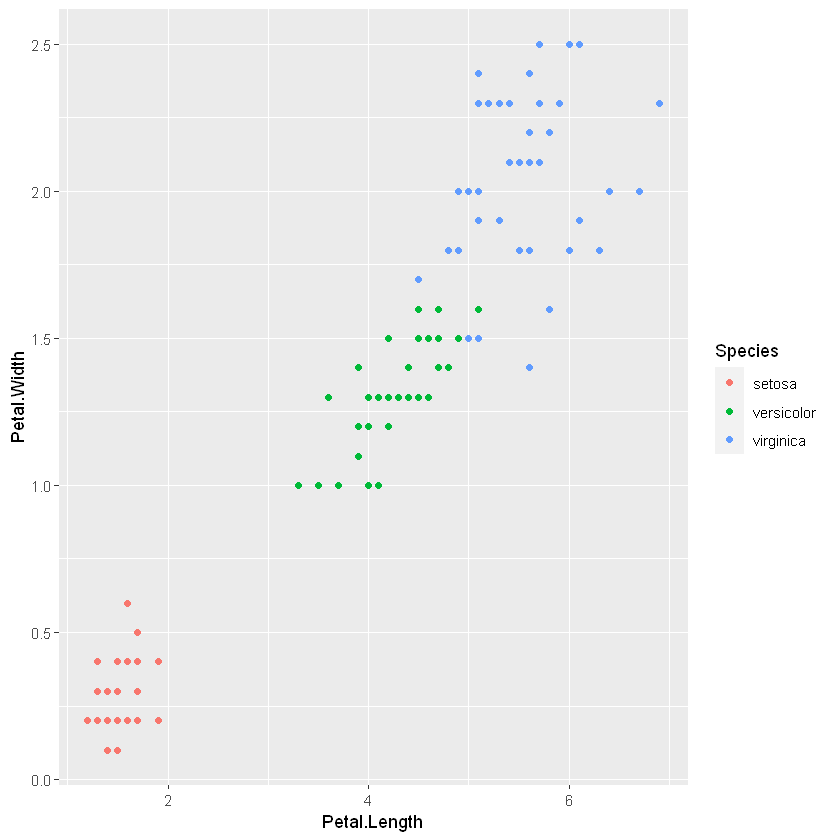

In [36]:
ggplot(iris_train,aes(x=Petal.Length,y=Petal.Width,color =Species))+ geom_point()


Por último vamos a probar utilizando tres variables: ___Sepal.Width, Petal.Length, Petal.Width___

In [37]:
x_swplpw <-iris_test[,c("Sepal.Width","Petal.Length","Petal.Width"),drop=F]
test_Sepal_Petal.Length_Width <- apply(x_swplpw,1,FUN=clasifica, medias_l=medias_swplpw, varianza_l=covarianzas_swplpw,delta=delta, aprioris=aprioris, clases=clases)

iris_test_Sepal_Petal.Length_Width <- cbind(iris_test, test_Sepal_Petal.Length_Width) %>% mutate(clasifica_bien = Species ==test_Sepal_Petal.Length_Width)

iris_test_Sepal_Petal.Length_Width

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,test_Sepal_Petal.Length_Width,clasifica_bien
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<lgl>
4.6,3.4,1.4,0.3,setosa,setosa,TRUE
4.4,2.9,1.4,0.2,setosa,setosa,TRUE
4.3,3.0,1.1,0.1,setosa,setosa,TRUE
4.6,3.6,1.0,0.2,setosa,setosa,TRUE
5.0,3.0,1.6,0.2,setosa,setosa,TRUE
5.4,3.4,1.5,0.4,setosa,setosa,TRUE
5.0,3.5,1.3,0.3,setosa,setosa,TRUE
4.4,3.2,1.3,0.2,setosa,setosa,TRUE
5.0,3.3,1.4,0.2,setosa,setosa,TRUE


Vemos la proporción de observaciones clasificadas de manera correcta.

In [38]:
iris_test_Sepal_Petal.Length_Width %>% 
    filter(clasifica_bien==TRUE) %>% 
    nrow() /nrow(iris_test_Sepal_Petal.Length_Width)

[1] 0.9655172

Podemos ver que el desempeño es bastante bueno, sin embargo, a diferencia de tomar únicamente dos variables, no tiene un cambio significativo.

## Conlusión

Añadir variables al modelo mejora su desempeño, sin embargo, el verdadero diferenciador es que las clases estén bien separadas.